<a href="https://colab.research.google.com/github/rizveehasan19/Guided-Projects/blob/main/Stochastic_Gradient_Descent.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Stochastic Gradient Descent (SGD) 
A popular optimization algorithm used to train machine learning models, particularly in deep learning. It is an extension of the standard gradient descent algorithm, which is used to optimize the parameters of a model by minimizing a given loss function. <br/>

The key difference between standard gradient descent and SGD is that in standard gradient descent, the algorithm uses the entire dataset to calculate the gradients and update the model parameters, while in SGD, the algorithm uses a small subset (or "batch") of the dataset to calculate the gradients and update the model parameters. <br/>

In [ ]:
%matplotlib inline

In [ ]:
import torch
from torch import tensor
import matplotlib.pyplot as plt

## Our Test Hypothesis

$y = h(x) = x^4$


In [ ]:
def plot_function(func, tx=None, ty=None, title=None, steps=40, min=-3, max=3, figsize=(10,6)):
    x = torch.linspace(min,max,steps)
    fig,ax = plt.subplots(figsize=figsize)
    ax.plot(x,func(x))
    if tx is not None: ax.set_xlabel(tx)
    if ty is not None: ax.set_ylabel(ty)
    if title is not None: ax.set_title(title)

In [ ]:
def h(x): return x**4

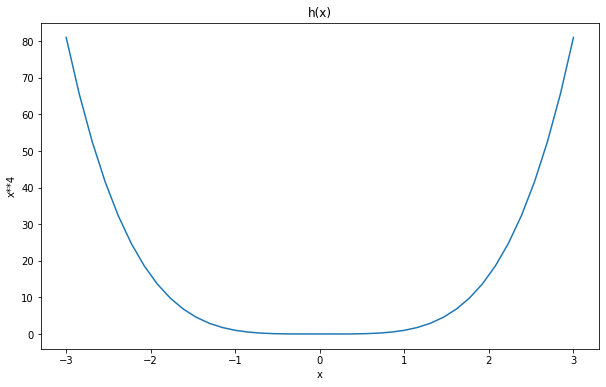

In [ ]:
plot_function(h, 'x', 'x**4', 'h(x)')

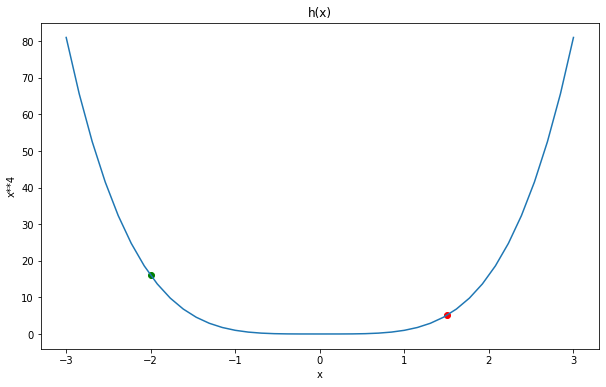

In [ ]:
plot_function(h, 'x', 'x**4', 'h(x)')
plt.scatter(-2, h(-2), color='green')
plt.scatter(1.5, h(1.5), color='red');

# Activating Gradient Accumulation

In [ ]:
x = tensor(3.).requires_grad_()
x

tensor(3., requires_grad=True)

`requires_grad_()` is a PyTorch function that sets the `requires_grad` attribute of a tensor to a specified value. The `requires_grad` attribute controls whether or not gradients with respect to the tensor should be calculated during the backward pass of a computation. By default, when a tensor is created, its `requires_grad` attribute is set to `False`

In [ ]:
y = h(x)
y

tensor(81., grad_fn=<PowBackward0>)

In [ ]:
y.backward()

`backward()` is a PyTorch function that is used to perform the backward pass of a computation in the computation graph. This function is typically called on a scalar tensor (i.e., a tensor with one element) that represents the final output of the computation, and it computes the gradients of the final output with respect to all the tensors that have their `requires_grad` attribute set to `True`.

In [ ]:
x.grad

tensor(108.)

**Explanation:** <br/>
Derivate of $h(x) = x^4$ is $h'(x) = 4 * x^3$ <br/>
If $x = 3$, then $h'(x) = 108$

**Let's try with tensor array**

In [ ]:
x = tensor([3.,4.,10.]).requires_grad_()
x

tensor([ 3.,  4., 10.], requires_grad=True)

In [ ]:
def f(x): return h(x).sum()

y = f(x)
y

tensor(10337., grad_fn=<SumBackward0>)

In [ ]:
y.backward()
x.grad

tensor([ 108.,  256., 4000.])

# Learning Rate and Gradient Steps

`Hyperparameter:` A hyperparameter is a parameter that is set before training a machine learning or deep learning model and controls the learning process or the architecture of the model. <br/>

`Learning rate` is a hyperparameter  that controls the step size at which the optimizer makes updates to the model parameters during training. It determines how fast or slow the optimizer should learn. It is typically a small positive. Some most common learning rates in practice are `0.001` and `1e-5`. <br/>

A *small* learning rate means that the optimizer makes `small updates` to the model parameters, which can lead to `slow convergence` but with a higher chance of `finding` the global minimum of the loss function. <br/>

A *large* learning rate means that the optimizer makes `big updates` to the model parameters, which can lead to `fast convergence` but with a higher chance of `overshooting` the global minimum of the loss function.

In [ ]:
lr = 1e-5

`Gradient Step:` $w = w - lr * w.grad$

Now, we will do a end-to-end stochastic gradient descent

# Data

We will get a data distribution close to our test hypothesis and check if we get something like our hypothesis.

In [ ]:
points = torch.arange(20).float() - 9.5
data = h(points) + torch.randn(20) * 400 - 1000

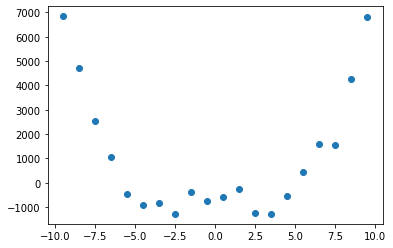

In [ ]:
plt.scatter(points, data)

# How To SGD

Instead of optimizing every function, we are going to optimize the loss of the following function which is closest
$$ f(x) = a * x^4 + b * x^3 + c * x^2 + d * x + e $$
The coefficients are the parameters, SGD needs to configure these parameters.

### Step 1: Initizing Parameters

In [ ]:
# Hypothesis Model
def f(x, params):
    a,b,c,d,e = params
    return a * (x**4) + b * (x**3) + c * (x**2) + d * x + e

In [ ]:
params = torch.randn(5).requires_grad_()

In [ ]:
params

tensor([-0.1808,  0.5600, -0.5444,  1.1924, -2.1461], requires_grad=True)

In [ ]:
og_params = params.clone()

### Step 2: Calculate Predictions

In [ ]:
preds = f(points, params)

In [ ]:
def show_preds(preds, ax=None):
    if ax is None: ax=plt.subplots()[1]
    ax.scatter(points, data)
    ax.scatter(points, preds.detach().numpy() , color='red')

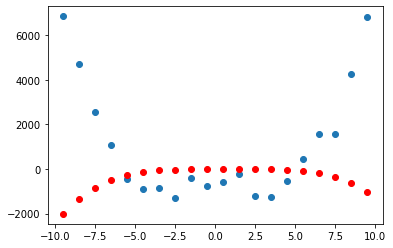

In [ ]:
show_preds(preds)

### Step 3: Calculate Loss

In [ ]:
# Loss Function MSE
def mse(preds, targets): 
  return ((preds-targets)**2).mean()/2

In [ ]:
loss = mse(preds, data)
loss

tensor(5733062., grad_fn=<DivBackward0>)

### Step 4: Calculate Gradients

In [ ]:
loss.backward()
params.grad

tensor([-1.0777e+07,  1.0170e+05, -1.3415e+05,  1.2866e+03, -1.4462e+03])

### Step 5: Take Gradient Step

In [ ]:
lr = 1e-7
params.data -= lr * params.grad.data
params.grad = None

In [ ]:
preds = f(points,params)
mse(preds, data)

tensor(379574.4688, grad_fn=<DivBackward0>)

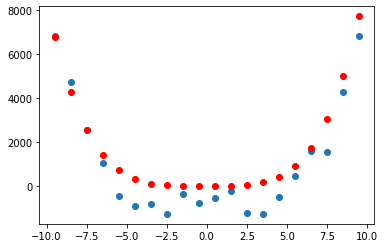

In [ ]:
show_preds(preds)

### Putting it altogether

In [ ]:
def take_step(step_no, params, prn=True):
    preds = f(points, params)
    loss = mse(preds, data)
    loss.backward()
    params.data -= lr * params.grad.data
    params.grad = None
    print(f"Step: {step_no+1} ==>> Loss: {loss.item()}")
    return preds

In [ ]:
for i in range(10): 
  take_step(i, params)

Step: 1 ==>> Loss: 379574.46875
Step: 2 ==>> Loss: 345700.8125
Step: 3 ==>> Loss: 344524.4375
Step: 4 ==>> Loss: 343575.71875
Step: 5 ==>> Loss: 342654.5625
Step: 6 ==>> Loss: 341759.0
Step: 7 ==>> Loss: 340888.3125
Step: 8 ==>> Loss: 340041.75
Step: 9 ==>> Loss: 339218.6875
Step: 10 ==>> Loss: 338418.5625


# More Readings on SGD


SGD is called "stochastic" because the algorithm uses random samples from the dataset to update the model parameters. This means that the gradients and parameter updates can vary from iteration to iteration, and the algorithm can jump around the optimization landscape, rather than moving smoothly towards the minimum like batch gradient descent.

SGD has some benefits over batch gradient descent:

- It can handle large datasets that don't fit in memory
- It can escape from local minima
- It can converge faster

SGD has several variants including:

- Mini-batch stochastic gradient descent (MB-SGD): which uses a subset of the dataset to update the model parameters, but not just one example.
- Momentum: which adds a momentum term to the update rule to smooth out oscillations and converge faster.
- Nesterov Momentum: which slightly alters the momentum term to make it more effective in cases where the optimization surface is non-convex.
- Adagrad: which adapts the learning rate to the parameters, performing larger updates for infrequent and smaller updates for frequent parameters
- Adadelta: which adapts the learning rate based on a moving window of gradient updates, rather than accumulating all past gradients.
- Adam: which combines the ideas of Adagrad and Momentum

As with any optimization algorithm, the choice of which variant of SGD to use depends on the specific problem and dataset being used. Generally Adam is the most commonly used optimizer nowadays and most of the time it works well.